In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for sheet in misinfotext_file.sheet_names:
        if sheet == "Proportion Summary":
            continue
        
        df = pd.read_excel(misinfotext_file, sheet_name=sheet)
        df["year"] = sheet
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for sheet in fakespeak_file.sheet_names:
        if sheet == "Proportion Summary":
            continue
        
        df = pd.read_excel(fakespeak_file, sheet_name=sheet)
        df["year"] = sheet
        yield df

In [15]:
years_dfs = list(get_years_dfs(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_all_caps.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_all_caps.xlsx",
))

In [16]:
years_dfs[0].head()

,factcheckURL,originalBodyText,originalTextType,proportion_upper_to_alpha_tokens,year
0,http://www.politifact.com/truth-o-meter/statem...,"Washington, D.C., Mar 25 - In response to sugg...",Press release,0.036585,2009
1,http://www.politifact.com/truth-o-meter/statem...,"""There's an inherent conflict of interest....T...",Press release,0.033195,2009
2,http://www.politifact.com/truth-o-meter/statem...,"Global Warming: Given rising voter anger, memb...",News and blog,0.020408,2009
3,http://www.politifact.com/truth-o-meter/statem...,A number of people in the news analysis busine...,News and blog,0.017316,2009
4,http://www.politifact.com/truth-o-meter/statem...,"For weeks, President Obama has told us that hi...",Press release,0.013587,2009


Graph to see if normally distributed

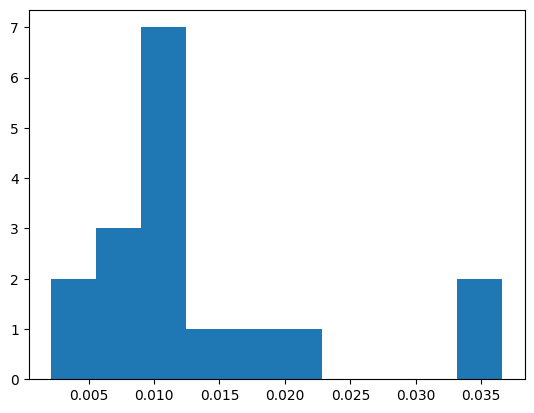

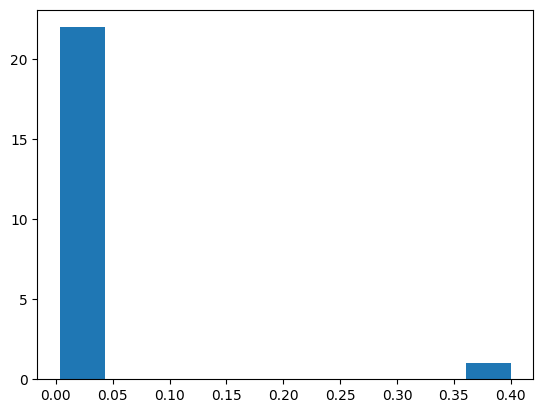

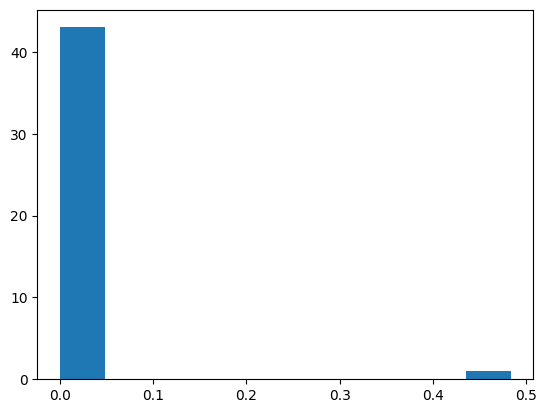

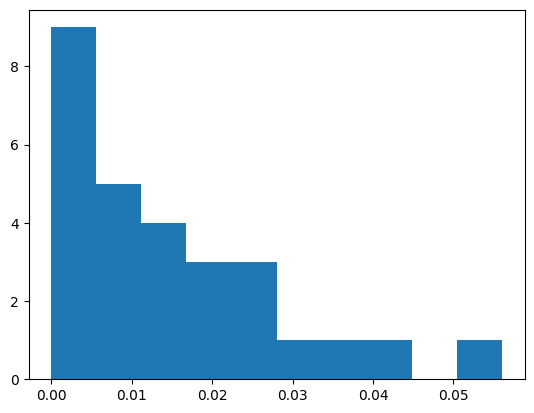

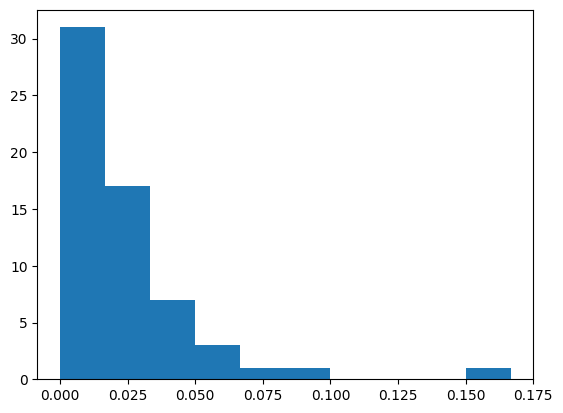

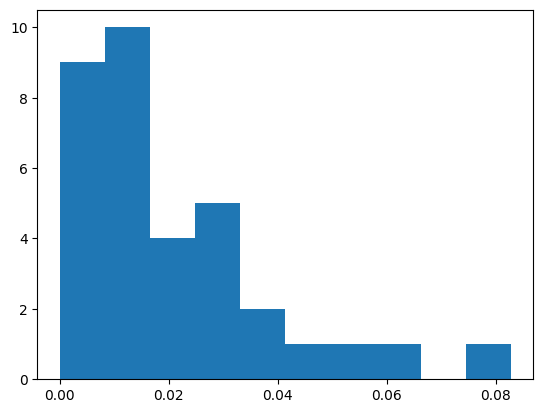

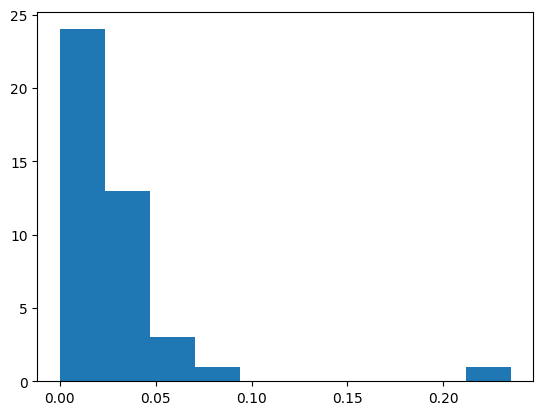

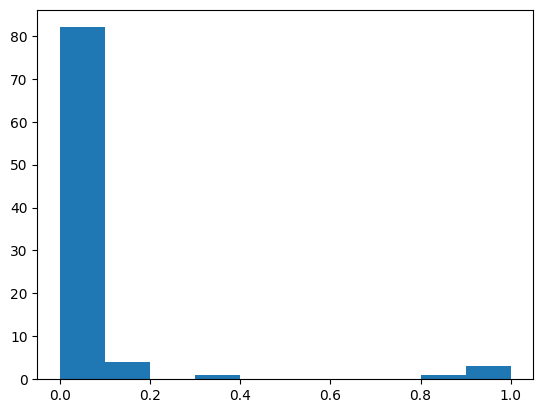

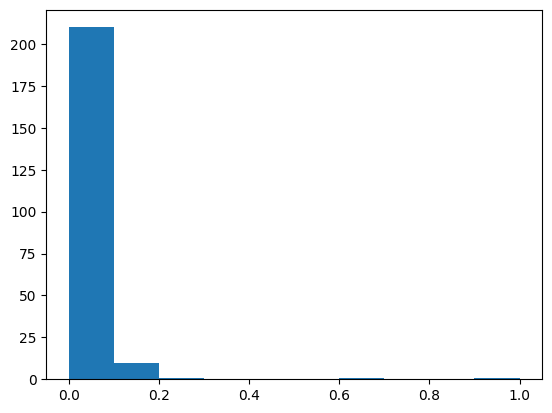

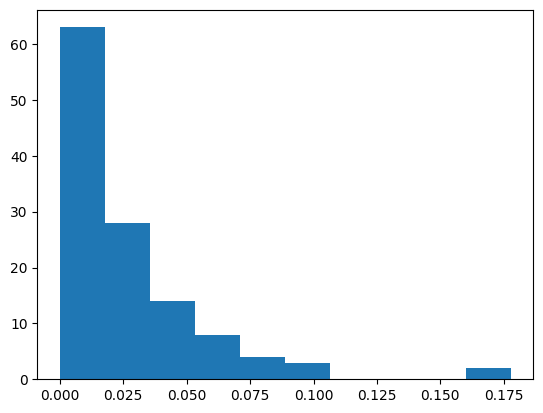

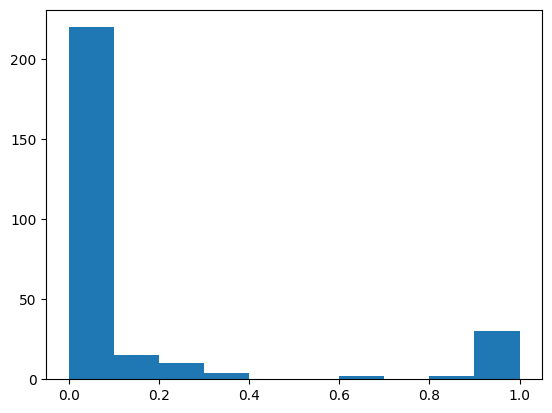

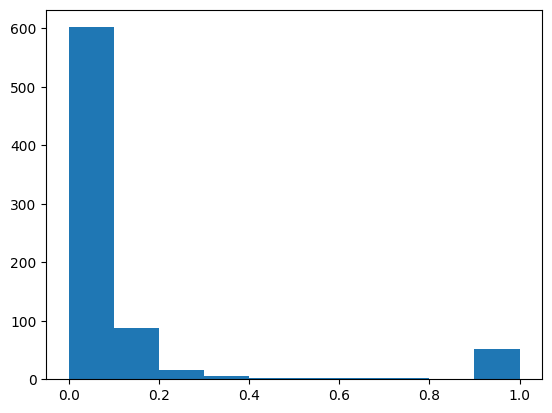

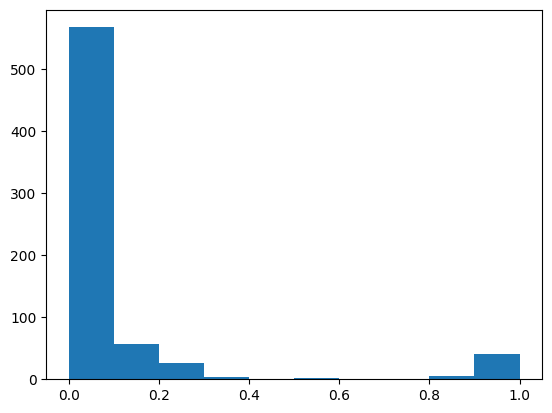

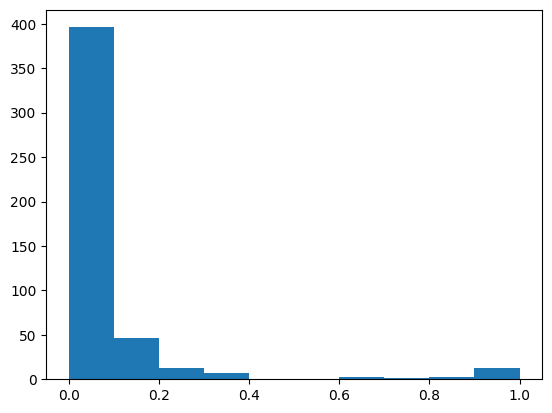

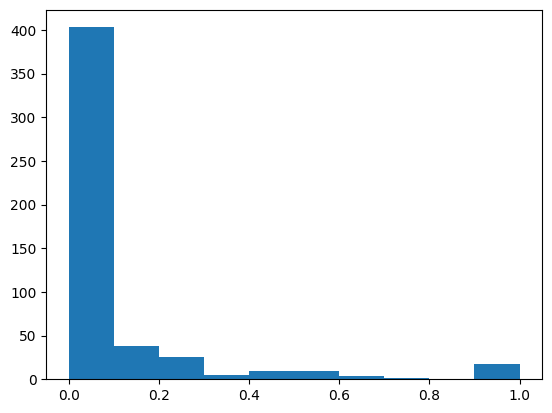

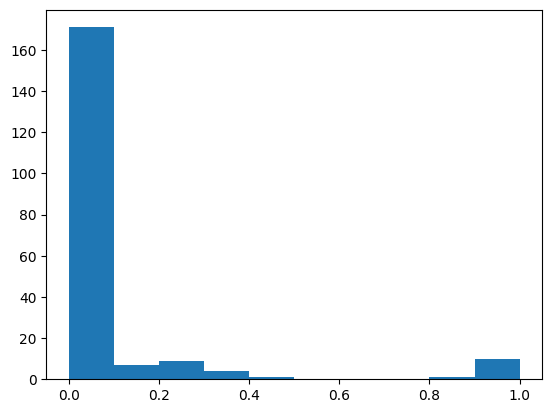

In [17]:
for df in years_dfs:
    plt.figure()
    plt.hist(df["proportion_upper_to_alpha_tokens"])

Not normally distributed, so need to use a non-parametric test

In [18]:
from scipy.stats import kruskal

In [19]:
kruskal(*[df["proportion_upper_to_alpha_tokens"] for df in years_dfs])

KruskalResult(statistic=61.87850440003496, pvalue=1.1955585358356085e-07)

There is a statistically significant difference in all-caps proportions between the years